In [1]:
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import requests, warnings
from tshistory.api import timeseries

In [19]:
import matplotlib.pyplot as plt

In [2]:
from kpler.sdk.configuration import Configuration
from kpler.sdk import Platform
from kpler.sdk.resources.flows import Flows
from kpler.sdk import FlowsDirection, FlowsSplit, FlowsPeriod, FlowsMeasurementUnit

config = Configuration(Platform.Liquids, "syed.ahmad@petrochinaintl.co.uk", "petroineos")
flows_client = Flows(config)

In [8]:
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

In [3]:
nwe_imports = flows_client.get(
    from_zones='North West Europe Zone',to_zones='North West Europe Zone', products='Crude/Condensate', granularity=[FlowsPeriod.Daily],
    start_date=dt(2013,1,1), end_date=dt.today(),unit=[FlowsMeasurementUnit.KBD],
    with_intra_country=False, flow_direction=[FlowsDirection.Export], split=[FlowsSplit.Total]
    ).drop(columns='Period End Date')

In [13]:
nwe_imports.head()

Date    Total
0 2013-01-01  1803.95
1 2013-01-02     0.00
2 2013-01-03  1106.43
3 2013-01-04   715.28
4 2013-01-05     0.00

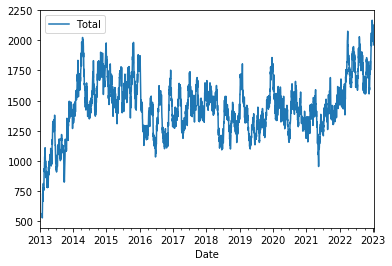

In [7]:
nwe_imports.set_index('Date').rolling(30).mean().plot()

In [10]:
brent_c1_c2 = 'price.platts.ice_brent_swap_spread.m01.usd_bbl.daily'
brent_front_spread = tsa.get(brent_c1_c2)

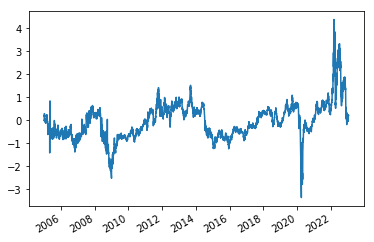

In [11]:
brent_front_spread.plot()

In [12]:
brent_front_spread.head()

2005-01-04    0.005
2005-01-05   -0.010
2005-01-06    0.180
2005-01-07    0.220
2005-01-10    0.300
Name: price.platts.ice_brent_swap_spread.m01.usd_bbl.daily, dtype: float64

In [14]:
nwe_imports['30mav'] = nwe_imports['Total'].rolling(30).mean()

In [16]:
nwe_corr = nwe_imports.set_index('Date').merge(brent_front_spread, how='left', left_index=True, right_index=True)

In [26]:
nwe_corr.head()

Total  30mav  \
Date                         
2013-01-01  1803.95    NaN   
2013-01-02     0.00    NaN   
2013-01-03  1106.43    NaN   
2013-01-04   715.28    NaN   
2013-01-05     0.00    NaN   

            price.platts.ice_brent_swap_spread.m01.usd_bbl.daily  
Date                                                              
2013-01-01                                                NaN     
2013-01-02                                               0.74     
2013-01-03                                               0.78     
2013-01-04                                               0.74     
2013-01-05                                                NaN

c:\conda\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\conda\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\conda\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


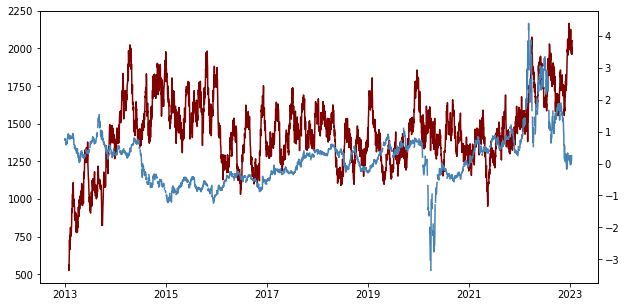

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(nwe_corr.index, nwe_corr['30mav'], color='maroon')
ax2 = ax.twinx()
ax2.plot(nwe_corr.index, nwe_corr['price.platts.ice_brent_swap_spread.m01.usd_bbl.daily'], color='steelblue')


In [42]:
values_20 = nwe_corr.loc['2020'].index
values_22 = nwe_corr.loc['2022'].index
cleaned = nwe_corr.drop(values_20, axis=0).drop(values_22, axis=0)

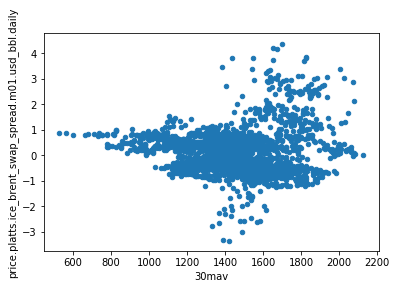

In [34]:
nwe_corr.plot.scatter(x='30mav', y='price.platts.ice_brent_swap_spread.m01.usd_bbl.daily')

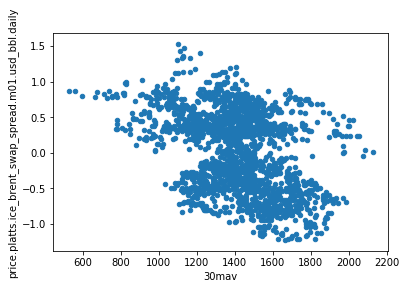

In [46]:
cleaned.plot.scatter(x='30mav', y='price.platts.ice_brent_swap_spread.m01.usd_bbl.daily')